### Loading Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle

%matplotlib inline

#### Reading Data

In [2]:
df = pd.read_excel("data/ex2.xlsx")
df = shuffle(df)
df.reset_index(drop=True, inplace=True)
df.head()

,location,sqt_ft,price
0,3,903,40
1,2,906,57
2,1,829,40
3,3,1327,66
4,2,2080,132


![title](img/location_details.png)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
location    100 non-null int64
sqt_ft      100 non-null int64
price       100 non-null int64
dtypes: int64(3)
memory usage: 2.4 KB


In [4]:
df.location.value_counts()

2    32
3    28
4    20
1    20
Name: location, dtype: int64

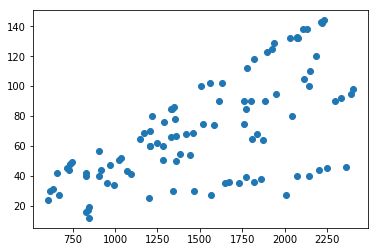

In [5]:
plt.scatter(df.sqt_ft, df.price)

In [7]:
## Convert the data into array type
X = df.iloc[:, :-1].values 
y = df.iloc[:,-1].values

In [8]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
print ('Intercept: %f'%lr.intercept_)
print ('Coefficients: %s'%str(lr.coef_))

Intercept: 32.692747
Coefficients: [-12.71362161   0.04476012]


In [9]:
print ('R2 score: %f'%r2_score(y, y_pred))
print ('Mean Squared Error:', mean_squared_error(y, y_pred))
print ('Mean Absoulte Error:', mean_absolute_error(y, y_pred))

R2 score: 0.546829
Mean Squared Error: 546.6638991326836
Mean Absoulte Error: 20.528473682035013


#### Why I am not getting a better accuracy?? 
![title](img/ques.jpg)

In [10]:
df.sample(10)

,location,sqt_ft,price
18,1,608,24
50,2,1286,76
90,2,2105,138
45,4,2199,44
91,3,1521,75
24,4,1860,38
38,4,842,17
95,4,1203,25
51,3,1762,75
56,1,1835,68


In [11]:
df.location = df.location.astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
location    100 non-null object
sqt_ft      100 non-null int64
price       100 non-null int64
dtypes: int64(2), object(1)
memory usage: 2.4+ KB


In [12]:
df = pd.get_dummies(df)
df.head()

,sqt_ft,price,location_1,location_2,location_3,location_4
0,903,40,0,0,1,0
1,906,57,0,1,0,0
2,829,40,1,0,0,0
3,1327,66,0,0,1,0
4,2080,132,0,1,0,0


In [42]:
df = pd.get_dummies

In [14]:
## Convert the data into array type
X = df.iloc[:, [0,2,3,4,5]].values
y = df.iloc[:,1].values


In [15]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
print ('Intercept: %f'%lr.intercept_)
print ('Coefficients: %s'%str(lr.coef_))

Intercept: -6.478460
Coefficients: [  0.0466936   -5.10551734  32.45650741  10.12294113 -37.4739312 ]


In [16]:
print ('R2 score: %f'%r2_score(y, y_pred))
print ('Mean Squared Error:', mean_squared_error(y, y_pred))
print ('Mean Absoulte Error:', mean_absolute_error(y, y_pred))

R2 score: 0.926405
Mean Squared Error: 88.77830717944693
Mean Absoulte Error: 7.26819925333356
